# K - Means Clustering

### Context
k-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics. What is the meaning of unsupervised learning? It means that the observations given in the data set are unlabeled, there is no outcome to be predicted. We are going to use a Wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
df = pd.read_csv('wine.csv')
df.columns=['Class', 'Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
            'Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ]

In [57]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## Clustering the Data

### Standardizing the data

In [58]:
from sklearn.cluster import KMeans

### Optimization of the n cluster: Inertia / Silhouette

In [59]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Optimization of the n cluster: Elbow method

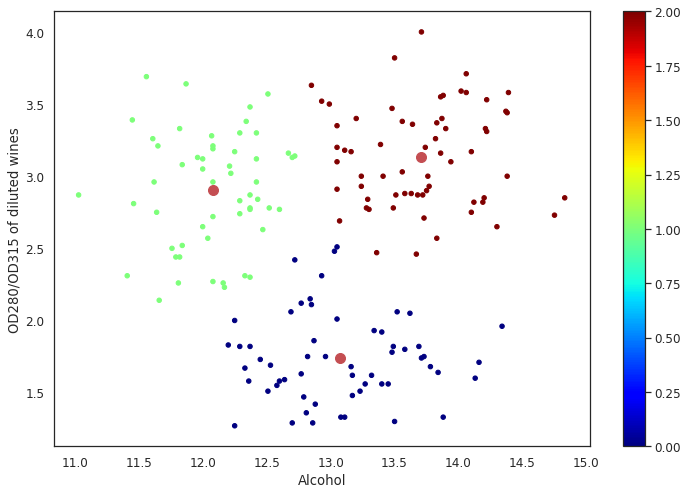

In [62]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 15)
kmeans = kmeans.fit(df.iloc[:,[12,1]])

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(df.iloc[:,[12,1]].columns.values))

fig, ax = plt.subplots(1, 1)

df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)

centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', ax = ax,  s = 100, mark_right=False, c='r')

In [76]:
dist = np.linalg.norm(kmeans.cluster_centers_[0]-)

In [77]:
dist

10.318645645086878

In [68]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,1.737414,13.074138
1,2.902909,12.079818
2,3.133281,13.706094


In [133]:
def find_cluster(centers, value):
    dist0 = np.linalg.norm(centers[0]-value)
    dist1 = np.linalg.norm(centers[1]-value)
    dist2 = np.linalg.norm(centers[2]-value)
    
    distance = min_of_three(dist0,dist1,dist2)
    
    return distance
    
    
def min_of_three(x,y,z):
    if (x<y) and (x<z):
        return 0
    elif (y<x) and (y<z):
        return 1
    elif (z<x) and (z<y):
        return 2
    
    

value_df = df.iloc[:,[1,12]]    

# I took the values from the graph to see if my function is working. And it's working pretty fine.
print(find_cluster(kmeans.cluster_centers_, (0.8,12.2)))
print(find_cluster(kmeans.cluster_centers_, (3.3,13.5)))
print(find_cluster(kmeans.cluster_centers_, (3.7,11.7)))



print(find_cluster(kmeans.cluster_centers_, value_df.iloc[12]))


0
2
1
1
